In [1]:
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7803, 0.9722, 0.2464],
        [0.1214, 0.2834, 0.9190],
        [0.9813, 0.6690, 0.4189],
        [0.1796, 0.5934, 0.0419],
        [0.3943, 0.0094, 0.0644]])


In [2]:
import torch       # ライブラリ「PyTorch」のtorchパッケージをインポート
import torch.nn as nn  # 「ニューラルネットワーク」モジュールの別名定義

# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
OUTPUT_NEURONS = 1  # ニューロンの数： 1

# 変数（モデル定義時に必要となるもの）
activation = torch.nn.Tanh()  # 活性化関数： tanh関数

# 「torch.nn.Moduleクラスのサブクラス化」によるモデルの定義
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 層（layer：レイヤー）を定義
        self.layer1 = nn.Linear(  # Linearは「全結合層」を指す
            INPUT_FEATURES,       # データ（特徴）の入力ユニット数
            OUTPUT_NEURONS)       # 出力結果への出力ユニット数

    def forward(self, input):
        # フォワードパスを定義
        output = activation(self.layer1(input))  # 活性化関数は変数として定義
        # 「出力＝活性化関数（第n層（入力））」の形式で記述する。
        # 層（layer）を重ねる場合は、同様の記述を続ければよい（第3回＝後述）。
        # 「出力（output）」は次の層（layer）への「入力（input）」に使う。
        # 慣例では入力も出力も「x」と同じ変数名で記述する（よって以下では「x」と書く）
        return output

# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()
model   # モデルの内容を出力

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)

In [3]:
# パラメーター（ニューロンへの入力で必要となるもの）の定義
weight_array = nn.Parameter(
    torch.tensor([[ 0.6,
                   -0.2]]))  # 重み
bias_array = nn.Parameter(
    torch.tensor([  0.8 ]))  # バイアス

# 重みとバイアスの初期値設定
model.layer1.weight = weight_array
model.layer1.bias = bias_array

# torch.nn.Module全体の状態を辞書形式で取得
params = model.state_dict()
#params = list(model.parameters()) # このように取得することも可能
params

OrderedDict([('layer1.weight', tensor([[ 0.6000, -0.2000]])),
             ('layer1.bias', tensor([0.8000]))])

In [4]:
x = torch.tensor(1.0, requires_grad=True)  # 今回は入力に勾配（gradient）を必要とする
# 「requires_grad」が「True」（デフォルト：False）の場合、
# torch.autogradが入力テンソルに関するパラメーター操作（勾配）を記録するようになる

#x.requires_grad_(True)  # 「requires_grad_()」メソッドで後から変更することも可能

y = x ** 2     # 「yイコールxの二乗」という計算式の計算グラフを構築
print(y)       # tensor(1., grad_fn=<PowBackward0>) ……などと表示される

y.backward()   # 逆伝播の処理として、上記式から微分係数（＝勾配）を計算（自動微分：Autograd）

g = x.grad     # 与えられた入力（x）によって計算された勾配の値（grad）を取得
print(g)       # tensor(2.)  ……などと表示される
# 計算式の微分係数（＝勾配）を計算するための導関数は「dy/dx=2x」なので、
#「x=1.0」地点の勾配（＝接線の傾き）は「2.0」となり、出力結果は正しい。
# 例えば「x=0.0」地点の勾配は「0.0」、「x=10.0」地点の勾配は「20.0」である

tensor(1., grad_fn=<PowBackward0>)
tensor(2.)


In [5]:
# 勾配計算の前に、各パラメーター（重みやバイアス）の勾配の値（grad）をリセットしておく
model.layer1.weight.grad = None      # 重み
model.layer1.bias.grad = None        # バイアス
#model.zero_grad()                   # これを呼び出しても上記と同じくリセットされる

X_data = torch.tensor([[1.0, 2.0]])  # 入力データ（※再掲）
y_pred = model(X_data)               # 出力結果（※再掲）
y_true = torch.tensor([[1.0]])       # 正解ラベル

criterion = nn.MSELoss()             # 誤差からの損失を測る「基準」＝損失関数
loss = criterion(y_pred, y_true)     # 誤差（出力結果と正解ラベルの差）から損失を取得
loss.backward()   # 逆伝播の処理として、勾配を計算（自動微分：Autograd）

# 勾配の値（grad）は、各パラメーター（重みやバイアス）から取得できる
print(model.layer1.weight.grad) # tensor([[-0.2002, -0.4005]])  ……などと表示される
print(model.layer1.bias.grad)   # tensor([-0.2002])  ……などと表示される
# ※パラメーターは「list(model.parameters())」で取得することも可能

tensor([[-0.2002, -0.4005]])
tensor([-0.2002])


In [6]:
import torch
import numpy as np

# テンソルの新規作成
x = torch.empty(2, 3) # 2行×3列のテンソル（未初期化状態）を生成
x = torch.rand(2, 3)  # 2行×3列のテンソル（ランダムに初期化）を生成
x = torch.zeros(2, 3, dtype=torch.float) # 2行×3列のテンソル（0で初期化、torch.float型）を生成
x = torch.ones(2, 3, dtype=torch.float)  # 2行×3列のテンソル（1で初期化、torch.float型）を生成
x = torch.tensor([[0.0, 0.1, 0.2],
                  [1.0, 1.1, 1.2]])      # 1行×2列のテンソルをPythonリスト値から作成

# 既存のテンソルを使った新規作成
# 「new_*()」パターン
y = x.new_ones(2, 3)   # 2行×3列のテンソル（1で初期化、既存のテンソルと「同じデータ型」）を生成
# 「*_like()」パターン # 既存のテンソルと「同じサイズ」のテンソル（1で初期化、torch.int型）を生成
y = torch.ones_like(x, dtype=torch.int) 

In [7]:
# テンソルサイズの取得
x.size()               # 「torch.Size([2, 3])」のように、2行3列と出力される
x.shape                # NumPy風の記述も可能。出力は上と同じ
len(x)   # 行数（＝データ数）を取得する際も、NumPy風に記述することが可能
x.ndim   # テンソルの次元数を取得する際も、NumPy風に記述が可能

# テンソルのサイズ変更／形状変更
z = x.view(3, 2)       # 3行2列に変更

In [8]:
# テンソルの計算操作
x + y                  # 演算子を使う方法
torch.add(x, y)        # 関数を使う方法
torch.add(x, y, out=x) # outパラメーターで出力先の変数を指定可能
x.add_(y)              # 「*_()」パターン。xを置き換えて出力する例（上記のコードと同じ処理）
# PyTorchでは、メソッド名の最後にアンダースコア（_）がある場合（例えば「add_()」）、「テンソルの内部置き換え（in-place changes）が起こること」を意味する。
# アンダースコア（_）がない通常の計算の場合（例えば「add()」）は、計算元のテンソル内部は変更されずに、戻り値として新たなテンソルが取得できる。

tensor([[2.0000, 2.1000, 2.2000],
        [3.0000, 3.1000, 3.2000]])

In [9]:
# インデクシングやスライシング（NumPyのような添え字を使用可能）
print(x)         # 元は、2行3列のテンソル
x[0, 1]          # 1行2列目（※0スタート）を取得
x[:2, 1:]        # 先頭～2行（＝0行目と1行目）×2列～末尾（＝2列目と3列目）の2行2列が抽出される

tensor([[2.0000, 2.1000, 2.2000],
        [3.0000, 3.1000, 3.2000]])


tensor([[2.1000, 2.2000],
        [3.1000, 3.2000]])

In [10]:
# テンソルの1つの要素値を、Pythonの数値に変換
x[0, 1].item()   # 1行2列目（※0スタート）の要素値をPythonの数値で取得

2.0999999046325684

In [11]:
# PyTorchテンソルを、NumPy多次元配列に変換
b = x.numpy()    # 「numpy()」を呼び出すだけ。以下は注意点（メモリ位置の共有）

# ※PyTorchテンソル側の値を変えると、NumPy多次元配列値「b」も変化する（トラックされる）
print ('PyTorch計算→NumPy反映：')
print(b); x.add_(y); print(b)           # PyTorch側の計算はNumPy側に反映
print ('NumPy計算→PyTorch反映：')
print(x); np.add(b, b, out=b); print(x) # NumPy側の計算はPyTorch側に反映

# -----------------------------------------
# NumPy多次元配列を、PyTorchテンソルに変換
c = np.ones((2, 3), dtype=np.float64) # 2行3列の多次元配列値（1で初期化）を生成
d = torch.from_numpy(c)  # 「torch.from_numpy()」を呼び出すだけ

# ※NumPy多次元配列値を変えると、PyTorchテンソル「d」も変化する（トラックされる）
print ('NumPy計算→PyTorch反映：')
print(d); np.add(c, c, out=c); print(d)  # NumPy側の計算はPyTorch側に反映
print ('PyTorch計算→NumPy反映：')
print(c); d.add_(y); print(c)            # PyTorch側の計算はNumPy側に反映

PyTorch計算→NumPy反映：
[[2.  2.1 2.2]
 [3.  3.1 3.2]]
[[3.  3.1 3.2]
 [4.  4.1 4.2]]
NumPy計算→PyTorch反映：
tensor([[3.0000, 3.1000, 3.2000],
        [4.0000, 4.1000, 4.2000]])
tensor([[6.0000, 6.2000, 6.4000],
        [8.0000, 8.2000, 8.4000]])
NumPy計算→PyTorch反映：
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)
PyTorch計算→NumPy反映：
[[2. 2. 2.]
 [2. 2. 2.]]
[[3. 3. 3.]
 [3. 3. 3.]]


In [12]:
# データ型の変換（※変換後のテンソルには、NumPyの計算は反映されない）
e = d.float()  # 「torch.float64」から「torch.float32」

In [13]:
# NVIDIAのGPUである「CUDA」（GPU）デバイス環境が利用可能な場合、
# GPUを使ってテンソルの計算を行うこともできる
if torch.cuda.is_available():              # CUDA（GPU）が利用可能な場合
    print('CUDA（GPU）が利用できる環境')
    print(f'CUDAデバイス数： {torch.cuda.device_count()}')
    print(f'現在のCUDAデバイス番号： {torch.cuda.current_device()}')  # ※0スタート
    print(f'1番目のCUDAデバイス名： {torch.cuda.get_device_name(0)}') # 例「Tesla T4」   

    device = torch.device("cuda")          # デフォルトのCUDAデバイスオブジェクトを取得
    device0 = torch.device("cuda:0")       # 1番目（※0スタート）のCUDAデバイスを取得

    # テンソル計算でのGPUの使い方は主に3つ：
    g = torch.ones(2, 3, device=device)    # （1）テンソル生成時のパラメーター指定
    g = x.to(device)                       # （2）既存テンソルのデバイス変更
    g = x.cuda(device)                     # （3）既存テンソルの「CUDA（GPU）」利用
    f = x.cpu()                            # （3'）既存テンソルの「CPU」利用

    # ※（2）の使い方で、GPUは「.to("cuda")」、CPUは「.to("cpu")」と書いてもよい
    g = x.to("cuda")
    f = x.to("cpu")

    # ※（3）の引数は省略することも可能
    g = x.cuda()

    # 「torch.nn.Module」オブジェクト（model）全体でのGPU／CPUの切り替え
    model.cuda()  # モデルの全パラメーターとバッファーを「CUDA（GPU）」に移行する
    model.cpu()   # モデルの全パラメーターとバッファーを「CPU」に移行する
else:
    print('CUDA（GPU）が利用できない環境')

CUDA（GPU）が利用できない環境


In [14]:
# 座標点データを生成するライブラリのインストール
!pip install playground-data

  Created wheel for playground-data: filename=playground_data-1.1.1-py2.py3-none-any.whl size=20787 sha256=11f16133c470871dd9c4eb20ee45d571e9f633167cca34621850732b3ebf0605
  Stored in directory: c:\users\ryoha\appdata\local\pip\cache\wheels\61\f2\36\55780518e4385f4d3180bc710f66904cfc103daa5e074b8376
Successfully built playground-data


In [15]:
# playground-dataライブラリのplygdataパッケージを「pg」という別名でインポート
import plygdata as pg

# 設定値を定数として定義
PROBLEM_DATA_TYPE = pg.DatasetType.ClassifyCircleData # 問題種別：「分類（Classification）」、データ種別：「円（CircleData）」を選択
TRAINING_DATA_RATIO = 0.5  # データの何％を訓練【Training】用に？ (残りは精度検証【Validation】用) ： 50％
DATA_NOISE = 0.0           # ノイズ： 0％

# 定義済みの定数を引数に指定して、データを生成する
data_list = pg.generate_data(PROBLEM_DATA_TYPE, DATA_NOISE)

# データを「訓練用」と「精度検証用」を指定の比率で分割し、さらにそれぞれを「データ（X）」と「教師ラベル（y）」に分ける
X_train, y_train, X_valid, y_valid = pg.split_data(data_list, training_size=TRAINING_DATA_RATIO)

# データ分割後の各変数の内容例として、それぞれ5件ずつ出力
print('X_train:'); print(X_train[:5])
print('y_train:'); print(y_train[:5])
print('X_valid:'); print(X_valid[:5])
print('y_valid:'); print(y_valid[:5])

X_train:
[[ 4.87362268  0.38445872]
 [-0.13254658  0.47962216]
 [ 0.35844454 -0.68676156]
 [ 0.18693752  1.89160769]
 [-3.08464514 -2.93898051]]
y_train:
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]]
X_valid:
[[ 0.21086285  0.32509686]
 [ 0.55111076 -0.06629613]
 [ 0.08933804  1.02348701]
 [ 2.06949344 -0.74432817]
 [-0.16874364 -0.06874526]]
y_valid:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [16]:
# データ関連のユーティリティクラスをインポート
from torch.utils.data import TensorDataset, DataLoader
import torch       # ライブラリ「PyTorch」のtorchパッケージをインポート

# 定数（学習方法設計時に必要となるもの）
BATCH_SIZE = 15  # バッチサイズ： 15（Playgroundの選択肢は「1」～「30」）

# NumPy多次元配列からテンソルに変換し、データ型は`float`に変換する
t_X_train = torch.from_numpy(X_train).float()
t_y_train = torch.from_numpy(y_train).float()
t_X_valid = torch.from_numpy(X_valid).float()
t_y_valid = torch.from_numpy(y_valid).float()

# 「データ（X）」と「教師ラベル（y）」を、1つの「データセット（dataset）」にまとめる
dataset_train = TensorDataset(t_X_train, t_y_train)  # 訓練用
dataset_valid = TensorDataset(t_X_valid, t_y_valid)  # 精度検証用

# ミニバッチを扱うための「データローダー（loader）」（訓練用と精度検証用）を作成
loader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)
loader_valid = DataLoader(dataset_valid, batch_size=BATCH_SIZE)

In [17]:
import torch       # ライブラリ「PyTorch」のtorchパッケージをインポート
import torch.nn as nn  # 「ニューラルネットワーク」モジュールの別名定義

# 離散化を行う単なる関数
def discretize(proba):
    '''
    実数の確率値を「1」か「-1」の2クラス分類値に離散化する。
    閾値は「0.0以上」か「未満」か。データ型は「torch.float」を想定。
  
    Examples:
        >>> proba = torch.tensor([-0.5, 0.0, 0.5], dtype=torch.float)
        >>> binary = discretize(proba)
    '''
    threshold = torch.Tensor([0.0]) # -1か1かを分ける閾値を作成
    discretized = (proba >= threshold).float() # 閾値未満で0、以上で1に変換
    return discretized * 2 - 1.0 # 2倍して-1.0することで、0／1を-1.0／1.0にスケール変換

# discretize関数をモデルで簡単に使用できるようにするため、
# PyTorchの「torch.nn.Module」を継承したクラスラッパーも作成した
class Discretize(nn.Module):
    '''
    実数の確率値を「1」か「-1」の2クラス分類値に離散化する。
    閾値は「0.0以上」か「未満」か。データ型は「torch.float」を想定。
  
    Examples:
        >>> d = Discretize()
        >>> proba = torch.tensor([-0.5, 0.0, 0.5], dtype=torch.float)
        >>> binary = d(proba)
    '''        
    def __init__(self):
        super().__init__()

    # forward()メソッドは、基本クラス「torch.nn.Module」の__call__メソッドからも呼び出されるため、
    # Discretizeオブジェクトを関数のように使える（例えば上記の「d(proba)」）
    def forward(self, proba):
        return discretize(proba) # 上記の関数を呼び出すだけ

# 関数の利用をテスト
proba = torch.tensor([-0.5, 0.0, 0.5], dtype=torch.float)  # 確率値の例
binary = discretize(proba)  # 2クラス分類（binary classification）値に離散化
binary  # tensor([-1.,  1.,  1.]) …… などと表示される

tensor([-1.,  1.,  1.])

In [18]:
import torch       # ライブラリ「PyTorch」のtorchパッケージをインポート
import torch.nn as nn  # 「ニューラルネットワーク」モジュールの別名定義

# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 2      # 入力（特徴）の数： 2
LAYER1_NEURONS = 3      # ニューロンの数： 3
LAYER2_NEURONS = 3      # ニューロンの数： 3
OUTPUT_RESULTS = 1      # 出力結果の数： 1

# 変数（モデル定義時に必要となるもの）
activation1 = torch.nn.Tanh()  # 活性化関数（隠れ層用）： tanh関数（変更可能）
activation2 = torch.nn.Tanh()  # 活性化関数（隠れ層用）： tanh関数（変更可能）
acti_out = torch.nn.Tanh()     # 活性化関数（出力層用）： tanh関数（固定）

# torch.nn.Moduleによるモデルの定義
class NeuralNetwork(nn.Module):

    # レイヤー（層）を定義
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # 隠れ層：1つ目のレイヤー（layer）
        self.layer1 = nn.Linear(
            INPUT_FEATURES,                # 入力ユニット数（＝入力層）
            LAYER1_NEURONS)                # 次のレイヤーへの出力ユニット数

        # 隠れ層：2つ目のレイヤー（layer）
        self.layer2 = nn.Linear(
            LAYER1_NEURONS,                # 入力ユニット数
            LAYER2_NEURONS)                # 次のレイヤーへの出力ユニット数

        # 出力層
        self.layer_out = nn.Linear(
            LAYER2_NEURONS,                # 入力ユニット数
            OUTPUT_RESULTS)                # 出力結果への出力ユニット数

    # フォワードパスを定義
    def forward(self, x):
        # 「出力＝活性化関数（第n層（入力））」の形式で記述
        x = activation1(self.layer1(x))  # 活性化関数は変数として定義
        x = activation2(self.layer2(x))  # 同上
        x = acti_out(self.layer_out(x))  # ※活性化関数は「tanh」固定
        return x

# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()
model   # モデルの内容を出力

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=3, bias=True)
  (layer_out): Linear(in_features=3, out_features=1, bias=True)
)

In [19]:
import torch.optim as optim   # 「最適化」モジュールの別名定義

# 定数（学習方法設計時に必要となるもの）
LEARNING_RATE = 0.03   # 学習率： 0.03
REGULARIZATION = 0.03  # 正則化率： 0.03

# オプティマイザーを作成（パラメーターと学習率も指定）
optimizer = optim.SGD(           # 最適化アルゴリズムに「SGD」を選択
    model.parameters(),          # 最適化で更新対象のパラメーター（重みやバイアス）
    lr=LEARNING_RATE,            # 更新時の学習率
    weight_decay=REGULARIZATION) # L2正則化（※不要な場合は0か省略）

In [20]:
# 変数（学習方法設計時に必要となるもの）
criterion = nn.MSELoss()  # 損失関数：平均二乗誤差

In [21]:
def train_step(train_X, train_y):
    # 訓練モードに設定
    model.train()

    # フォワードプロパゲーションで出力結果を取得
    #train_X                # 入力データ
    pred_y = model(train_X) # 出力結果
    #train_y                # 正解ラベル

    # 出力結果と正解ラベルから損失を計算し、勾配を求める
    optimizer.zero_grad()   # 勾配を0で初期化（※累積してしまうため要注意）
    loss = criterion(pred_y, train_y)     # 誤差（出力結果と正解ラベルの差）から損失を取得
    loss.backward()   # 逆伝播の処理として勾配を計算（自動微分）

    # 勾配を使ってパラメーター（重みとバイアス）を更新
    optimizer.step()  # 指定されたデータ分の最適化を実施

    # 正解率を算出
    with torch.no_grad(): # 勾配は計算しないモードにする
        discr_y = discretize(pred_y)         # 確率値から「-1」／「1」に変換
        acc = (discr_y == train_y).sum()     # 正解数を計算する

    # 損失と正解数をタプルで返す
    return (loss.item(), acc.item())  # ※item()=Pythonの数値

def valid_step(valid_X, valid_y):
    # 評価モードに設定（※dropoutなどの挙動が評価用になる）
    model.eval()
    
    # フォワードプロパゲーションで出力結果を取得
    #valid_X                # 入力データ
    pred_y = model(valid_X) # 出力結果
    #valid_y                # 正解ラベル

    # 出力結果と正解ラベルから損失を計算
    loss = criterion(pred_y, valid_y)     # 誤差（出力結果と正解ラベルの差）から損失を取得
    # ※評価時は勾配を計算しない

    # 正解率を算出
    with torch.no_grad(): # 勾配は計算しないモードにする
        discr_y = discretize(pred_y)     # 確率値から「-1」／「1」に変換
        acc = (discr_y == valid_y).sum() # 正解数を合計する

    # 損失と正解数をタプルで返す
    return (loss.item(), acc.item())  # ※item()=Pythonの数値

In [22]:
# パラメーター（重みやバイアス）の初期化を行う関数の定義
def init_parameters(layer):
    if type(layer) == nn.Linear:
        nn.init.xavier_uniform_(layer.weight) # 重みを「一様分布のランダム値」に初期化
        layer.bias.data.fill_(0.0)            # バイアスを「0」に初期化

# 学習の前にパラメーター（重みやバイアス）を初期化する
model.apply(init_parameters)

# 定数（学習／評価時に必要となるもの）
EPOCHS = 100             # エポック数： 100

# 変数（学習／評価時に必要となるもの）
avg_loss = 0.0           # 「訓練」用の平均「損失値」
avg_acc = 0.0            # 「訓練」用の平均「正解率」
avg_val_loss = 0.0       # 「評価」用の平均「損失値」
avg_val_acc = 0.0        # 「評価」用の平均「正解率」

# 損失の履歴を保存するための変数
train_history = []
valid_history = []

for epoch in range(EPOCHS):
    # forループ内で使う変数と、エポックごとの値リセット
    total_loss = 0.0     # 「訓練」時における累計「損失値」
    total_acc = 0.0      # 「訓練」時における累計「正解数」
    total_val_loss = 0.0 # 「評価」時における累計「損失値」
    total_val_acc = 0.0  # 「評価」時における累計「正解数」
    total_train = 0      # 「訓練」時における累計「データ数」
    total_valid = 0      # 「評価」時における累計「データ数」

    for train_X, train_y in loader_train:
        # 【重要】1ミニバッチ分の「訓練」を実行
        loss, acc = train_step(train_X, train_y)

        # 取得した損失値と正解率を累計値側に足していく
        total_loss += loss          # 訓練用の累計損失値
        total_acc += acc            # 訓練用の累計正解数
        total_train += len(train_y) # 訓練データの累計数
            
    for valid_X, valid_y in loader_valid:
        # 【重要】1ミニバッチ分の「評価（精度検証）」を実行
        val_loss, val_acc = valid_step(valid_X, valid_y)

        # 取得した損失値と正解率を累計値側に足していく
        total_val_loss += val_loss  # 評価用の累計損失値
        total_val_acc += val_acc    # 評価用の累計正解数
        total_valid += len(valid_y) # 訓練データの累計数

    # ミニバッチ単位で累計してきた損失値や正解率の平均を取る
    n = epoch + 1                             # 処理済みのエポック数
    avg_loss = total_loss / n                 # 訓練用の平均損失値
    avg_acc = total_acc / total_train         # 訓練用の平均正解率
    avg_val_loss = total_val_loss / n         # 訓練用の平均損失値
    avg_val_acc = total_val_acc / total_valid # 訓練用の平均正解率

    # グラフ描画のために損失の履歴を保存する
    train_history.append(avg_loss)
    valid_history.append(avg_val_loss)

    # 損失や正解率などの情報を表示
    print(f'[Epoch {epoch+1:3d}/{EPOCHS:3d}]' \
          f' loss: {avg_loss:.5f}, acc: {avg_acc:.5f}' \
          f' val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')

print('Finished Training')
print(model.state_dict())  # 学習後のパラメーターの情報を表示

[Epoch   1/100] loss: 27.14700, acc: 0.49600 val_loss: 21.71822, val_acc: 0.55200
[Epoch   2/100] loss: 9.14963, acc: 0.61600 val_loss: 6.92132, val_acc: 0.66000
[Epoch   3/100] loss: 4.47398, acc: 0.78400 val_loss: 3.88712, val_acc: 0.82800
[Epoch   4/100] loss: 2.90991, acc: 0.80000 val_loss: 2.75248, val_acc: 0.83200
[Epoch   5/100] loss: 2.13406, acc: 0.86000 val_loss: 2.00672, val_acc: 0.82800
[Epoch   6/100] loss: 1.70766, acc: 0.81600 val_loss: 1.56362, val_acc: 0.84800
[Epoch   7/100] loss: 1.38308, acc: 0.78400 val_loss: 1.29081, val_acc: 0.85200
[Epoch   8/100] loss: 1.16109, acc: 0.81200 val_loss: 1.17332, val_acc: 0.81600
[Epoch   9/100] loss: 0.98018, acc: 0.83600 val_loss: 0.94478, val_acc: 0.86000
[Epoch  10/100] loss: 0.83432, acc: 0.83600 val_loss: 0.85878, val_acc: 0.84800
[Epoch  11/100] loss: 0.74450, acc: 0.85200 val_loss: 0.72538, val_acc: 0.84400
[Epoch  12/100] loss: 0.66778, acc: 0.85200 val_loss: 0.63853, val_acc: 0.87600
[Epoch  13/100] loss: 0.62353, acc: 0.

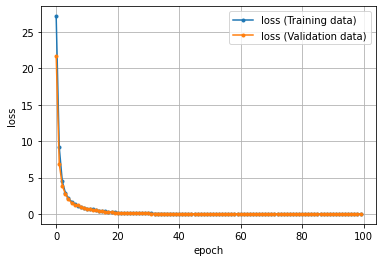

In [23]:
import matplotlib.pyplot as plt

# 学習結果（損失）のグラフを描画
epochs = len(train_history)
plt.plot(range(epochs), train_history, marker='.', label='loss (Training data)')
plt.plot(range(epochs), valid_history, marker='.', label='loss (Validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()